In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
col_l = []
for col in data.columns:
    col = col.replace(" ","_")
    col_l.append(col.lower())
data.columns = col_l
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:
data['income'].isna().sum()

0

In [5]:
# 2.Load the continuous and discrete variables into continuous_df and discrete_df variables.
continuous, discrete = [],[]
def diferentiate():
    for col in data.columns:
        if len(data[col].unique()) <= 10:
            #print("DISCRETE")
            discrete.append(col)
        
        else:
            #print("CONTINOUS")
            continuous.append(col)
    print("CONTINOUS COLUMNS: ",continuous)
    print("DISCRETE COLUMNS: ",discrete)

# CALL THE FUNCTION
diferentiate() 

CONTINOUS COLUMNS:  ['customer', 'customer_lifetime_value', 'effective_to_date', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
DISCRETE COLUMNS:  ['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [6]:
discrete_df = data[discrete]
display(discrete_df.head())

continuous_df = data[continuous]
continuous_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2/24/11,56274,69,32,5,384.811147
1,QZ44356,6979.535903,1/31/11,0,94,13,42,1131.464935
2,AI49188,12887.431650,2/19/11,48767,108,18,38,566.472247
3,WW63253,7645.861827,1/20/11,0,106,18,65,529.881344
4,HB64268,2813.692575,2/3/11,43836,73,12,44,138.130879


In [7]:
continuous_df['income'].isna().sum()

0

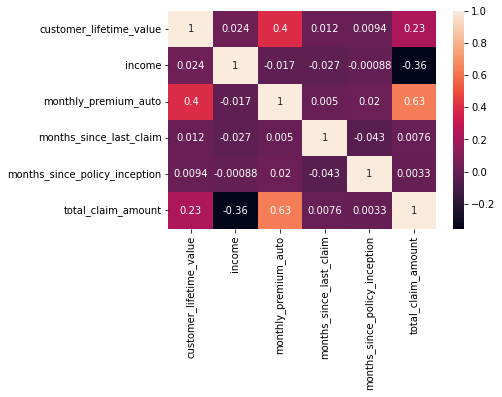

In [8]:
# 3. Plot a correlation matrix, what can you see?

correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# There is low colinearity between columns

In [9]:
continuous_df['income'].isna().sum()

0

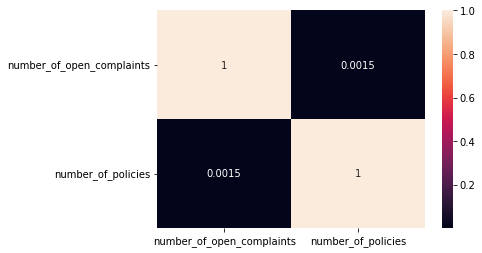

In [10]:
correlations_matrix = discrete_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [11]:
discrete_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

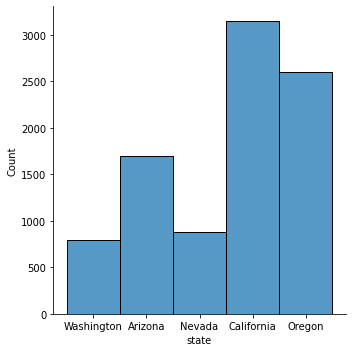

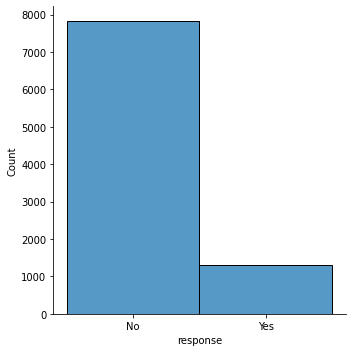

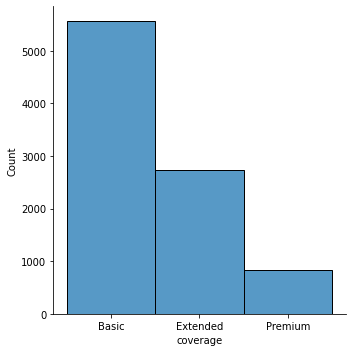

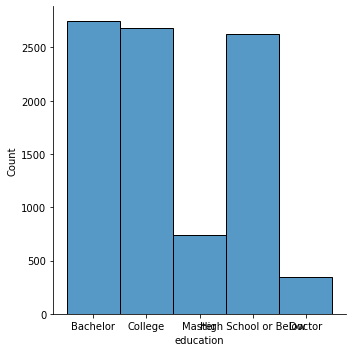

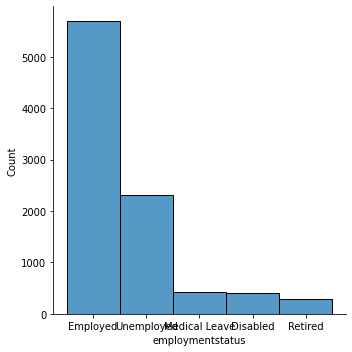

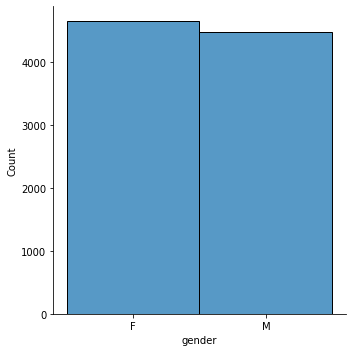

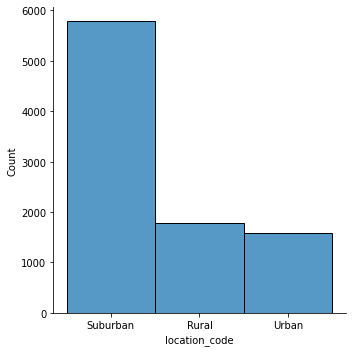

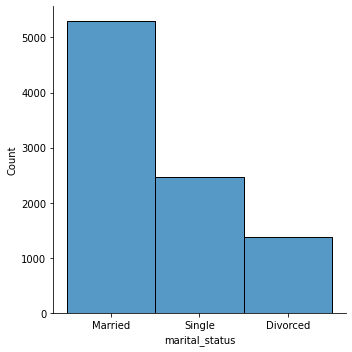

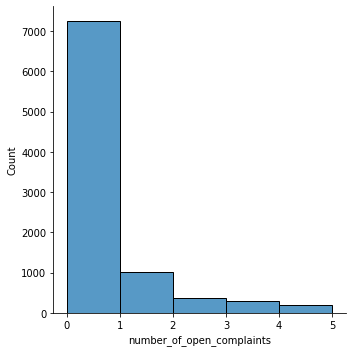

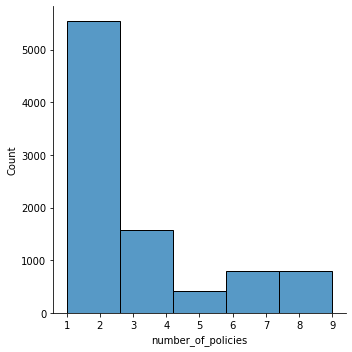

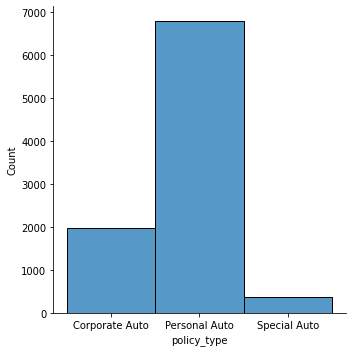

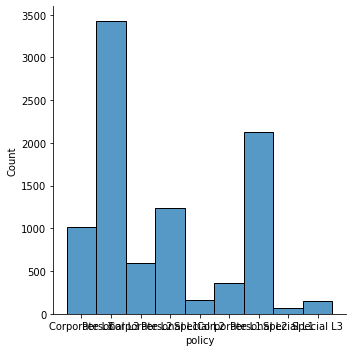

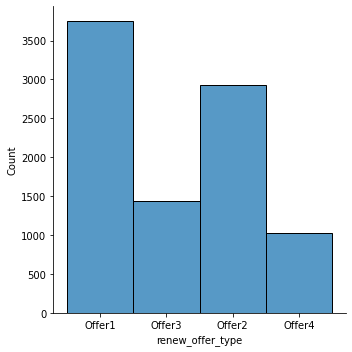

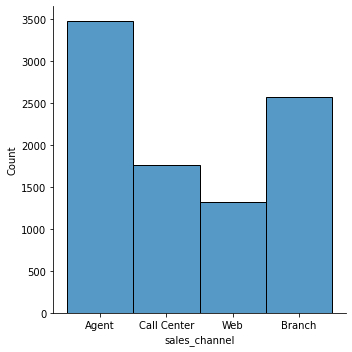

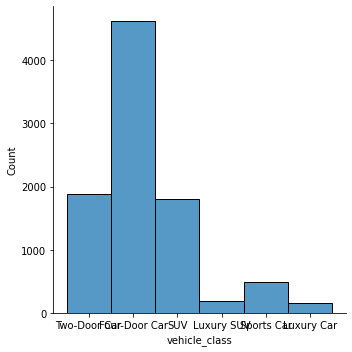

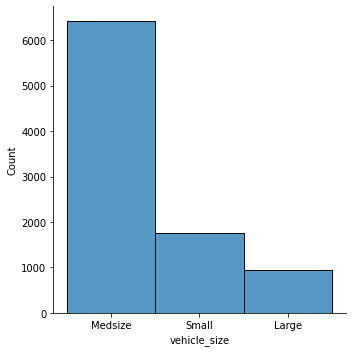

In [12]:
# sns.displot(discrete_df['education'])
# plt.show()
def plot_discrete():
    for col in discrete_df:        
        sns.displot(discrete_df[col], bins =5)
        plt.show()
        
plot_discrete()

In [13]:
discrete_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [14]:
# COMBINE MASTER AND DOCTOR

def replace_fxn(x):
    x = str(x)
    if x == 'Master' or x == 'Doctor':
        return 'post_grad'
    else:
        return x
discrete_df['education'] = discrete_df['education'].apply(lambda x: replace_fxn(x))
discrete_df['education'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_18860/2911714135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['education'] = discrete_df['education'].apply(lambda x: replace_fxn(x))


Bachelor                2748
College                 2681
High School or Below    2622
post_grad               1083
Name: education, dtype: int64

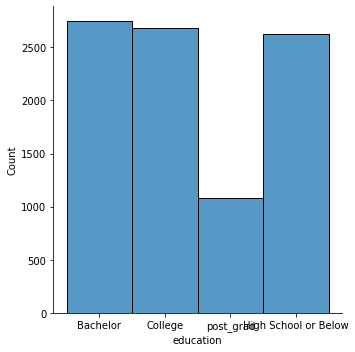

In [15]:
sns.displot(discrete_df['education'])
plt.show()

In [16]:
discrete_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [17]:
# COMBINE Medical Leave, Disabled,Retired  INTO OTHERS 

def replace_fxn(x):
    x = str(x)
    if x == 'Disabled' or x == 'Retired' or x == 'Medical Leave':
        return 'others'
    else:
        return x
discrete_df['employmentstatus'] = discrete_df['employmentstatus'].apply(lambda x: replace_fxn(x))
discrete_df['employmentstatus'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_18860/1576988295.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['employmentstatus'] = discrete_df['employmentstatus'].apply(lambda x: replace_fxn(x))


Employed      5698
Unemployed    2317
others        1119
Name: employmentstatus, dtype: int64

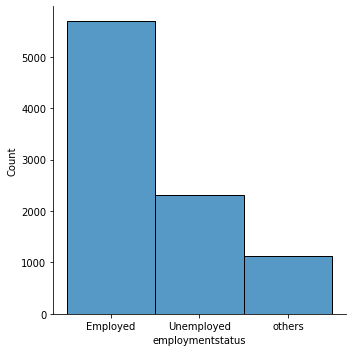

In [18]:
sns.displot(discrete_df['employmentstatus'])
plt.show()

In [19]:
discrete_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [20]:
# COMBINE Medical Leave, Disabled,Retired  INTO OTHERS 

def replace_fxn(x):
    x = str(x)
    if x == 'Nevada' or x == 'Washington':
        return 'others'
    else:
        return x
discrete_df['state'] = discrete_df['state'].apply(lambda x: replace_fxn(x))
discrete_df['state'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_18860/1943387345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['state'] = discrete_df['state'].apply(lambda x: replace_fxn(x))


California    3150
Oregon        2601
Arizona       1703
others        1680
Name: state, dtype: int64

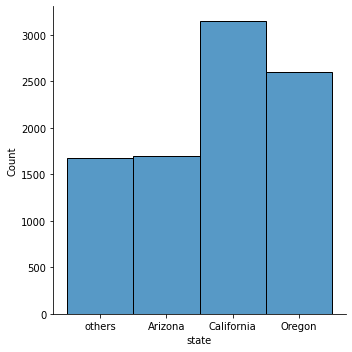

In [21]:
sns.displot(discrete_df['state'])
plt.show()

In [22]:
# number_of_open_complaints', 'number_of_policies' COLUMNS TO BE TREATED LIKE NUMERICAL COLUMNS

In [23]:
continuous_df.columns

Index(['customer', 'customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

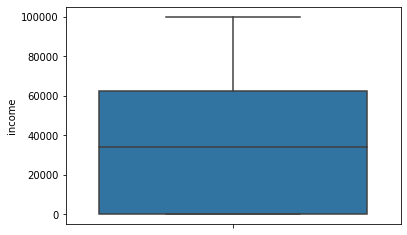

In [24]:
sns.boxplot(y=continuous_df['income'])
plt.show()

<AxesSubplot:>

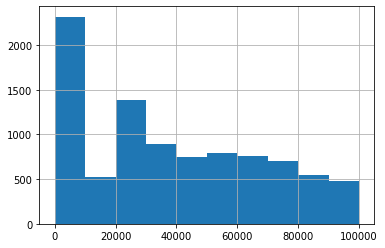

In [25]:
continuous_df['income'].hist()

In [26]:
# effective_to_date is a datetime. so, we drop it
continuous_df = continuous_df.drop(['customer','effective_to_date'], axis = 1)

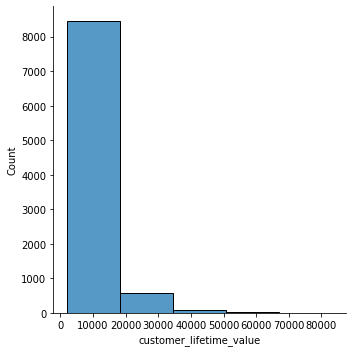

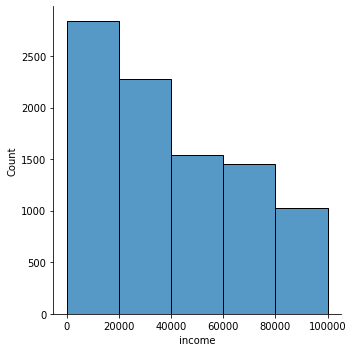

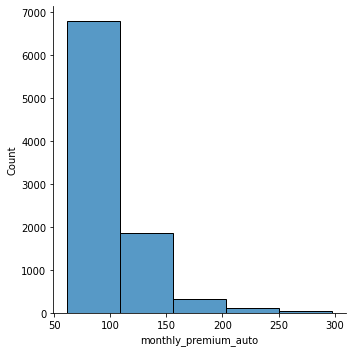

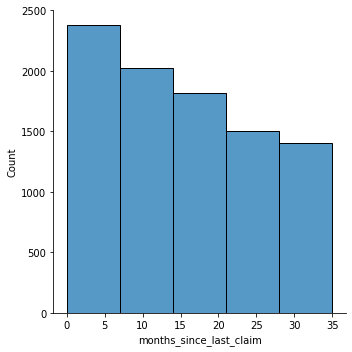

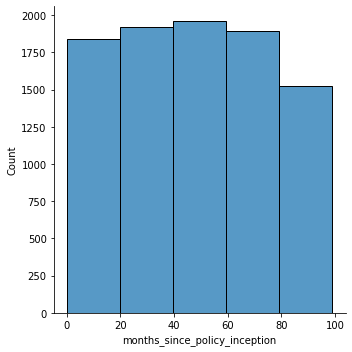

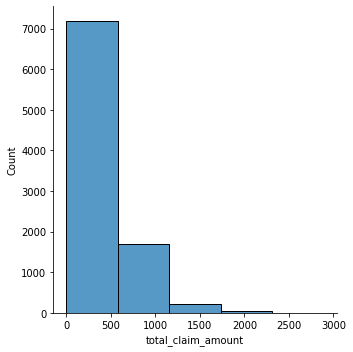

In [27]:
#MAKING PLOTS FOR CONTINOUS DATA

def plot_continous():
    for col in continuous_df:        
        sns.displot(continuous_df[col], bins =5)
        plt.show()
        
plot_continous()

In [28]:
# 6. Look for outliers in the continuous variables we have found. We are using the income column only
iqr = np.percentile(continuous_df['income'],75) - np.percentile(continuous_df['income'],25)
#iqr
upper_limit = np.percentile(continuous_df,50) + 1.5 * iqr
upper_limit

93580.0

In [29]:
# WHEN DONE FOR ALL COLUMNS AT ONCE, IQR INTRODUCES NaN VALUES IN THE INCOME COLUMN

In [30]:
continuous_df.shape

(9134, 6)

In [31]:
continuous_df = continuous_df[continuous_df['income'] < upper_limit]

In [32]:
continuous_df.shape

(8829, 6)

In [33]:
# NO OUTLIERS FOUND. I USED UPPER LIMIT ONLY
# NUMBER OF OUTLIERS
no_of_outliers = 9134 - 8829
print('No of Outliers: ', no_of_outliers)

No of Outliers:  305


In [34]:
# 8. Check nan values per column.
continuous_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
dtype: int64

In [35]:
# QUESTIONS 9 - 11 SUBMITTED IN "CLEANING NUMERICAL DATA LAB"

In [36]:
# 12. What should we do with the customer id column?
# When building and teaching the model, The customer_id column should be dropped because it does not help us in making predictions. Its simply a unique identifier.
#Make a copy of the dataframe without the customer_id column. After building and training the model, you can use the original
# dataframe with the customer_id to identify individual customers after making predictions